# Exercise - 05/05/2002

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considering **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression

***

In [1]:
#importing used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#loading the dataset
df = pd.read_csv('datasets/weight-height.csv')

In [4]:
#showing basic info about the dataset
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Gender'].drop_duplicates()

0         Male
5000    Female
Name: Gender, dtype: object

The dataset has 10000 lines and three columns, divided in two genders only.

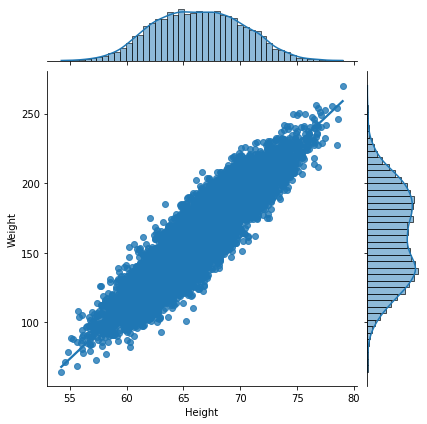

In [7]:
#visualizing the data dispersion
sns.jointplot(data=df, x='Height', y='Weight', kind='reg')

***

1- Split the dataset into 80% for training and 20% for testing

In [8]:
X = df[['Height']] #independent variable
y = df[['Weight']] #dependent variable

In [9]:
#splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1215)

In [10]:
#shape of the test data
print(f'X_train size: {X_train.shape[0]}\nX_test size: {X_test.shape[0]}\ny_train size: {y_train.shape[0]}\ny_test size: {y_test.shape[0]}')

X_train size: 8000
X_test size: 2000
y_train size: 8000
y_test size: 2000


The train/test set is split 80/20

2 - Compute the correlation between the training set variables

In [11]:
corr_set = df['Height'].corr(df['Weight'])
corr_train = X_train['Height'].corr(y_train['Weight'])
print(f'The general correlation of the weight and height in the whole dataset is {corr_set:.4f}. For the training set it is {corr_train:.4f}.')

The general correlation of the weight and height in the whole dataset is 0.9248. For the training set it is 0.9237.


3 - Train a regression model considering **height** as the independent variable and **weight** as the dependent one

In [12]:
reg = LinearRegression()

In [13]:
#The set was already divided using height as independent variable and weight as the dependent one
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f'The intercept of this regression (theta0) is {reg.intercept_[0]:.4f}, and the coefficient (theta1, slope) is {reg.coef_[0][0]:.4f}.')

The intercept of this regression (theta0) is -351.4145, and the coefficient (theta1, slope) is 7.7281.


4 - Compute the model determination coefficient

In [15]:
R2 = reg.score(X_train,y_train)
print(f'The model determination coefficient (R²) is {R2:.4f}. It explains {R2:.2%} of the variance.')

The model determination coefficient (R²) is 0.8532. It explains 85.32% of the variance.


5 - Plot a scatterplot of the two variables containing the regression model (line)

In [32]:
prediction_x = X_train['Height'].to_numpy()
prediction_y = reg.predict(X_train).ravel()



array([73.05634425, 69.65975352, 66.65652059, ..., 67.47905167,
       60.86159962, 63.98176489])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

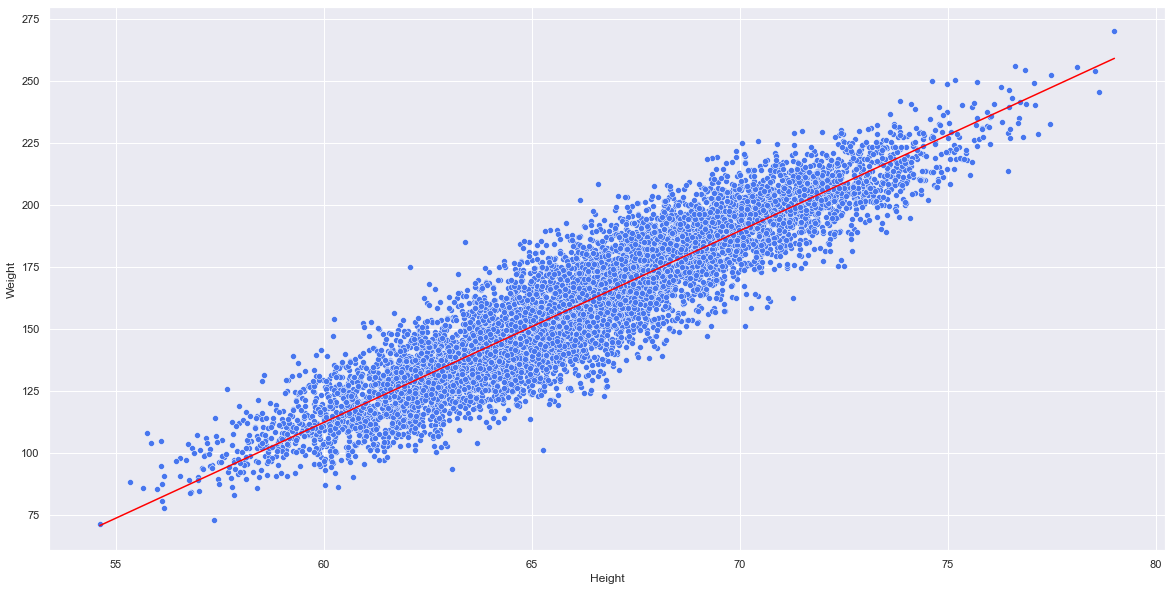

In [61]:
sns.set(palette='turbo', rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=X_train['Height'], y = y_train['Weight'])
sns.lineplot(x=prediction_x, y = prediction_y, color ='red')

In [ ]:
sns.scatterplot(data=X_train, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

In [ ]:
X_line = X_train['Height'].values
#y_line = reg.predict(X)
X_line

In [ ]:
y_line.size

In [ ]:
sns.scatterplot(x=X_line, y=y_line)
#sns.lineplot(x=x_line, y=y_line, color="red")
#axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
#axs[0].set_xlabel('Experience (Years)')
#axs[0].set_ylabel('Salary ($)')

In [ ]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })

In [ ]:
regression_line_x = pd.Series(df.X_train)

In [ ]:
regression_line_x = pd.Series(df.X_train)
regression_line_y = pd.Series(df.Y)

sns.scatterplot(data=X_train, x=X_train['Height'], y=y_train)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X_train
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train, y=y_train)
sns.scatterplot(x=X_train, y=y_train)
#sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

Dúvidas